In [1]:
from src.utils import interpolate_to_percentage, set_axes_equal
import matplotlib.pyplot as plt
import h5py
import numpy as np
np.set_printoptions(precision=3, suppress=True)
%matplotlib widget

import cv2
import mediapy

In [2]:
def get_positions(path):
    f = h5py.File(path,'r')
    poses = np.array(f['pose_values'])
    return poses[:,:3,3]*1000

In [3]:
demos_lab =[
    get_positions("/Users/jannik/Repos/demonstration-interface/data/session_20240626_124925_LAB_with_tracking/episode_20240626_125231.h5")
]

demos_vicon = [
    get_positions("/Users/jannik/Repos/demonstration-interface/data/session_20240626_144414_VICON_with_tracking/episode_20240626_144627.h5")
]

demos_lab_large = [
    get_positions("/Users/jannik/Repos/demonstration-interface/data/session_20240626_171427_LAB_LARGE_with_tracking1/episode_20240626_171735.h5")
]

demos_kitchen = [
    get_positions("/Users/jannik/Repos/demonstration-interface/data/session_20240627_152058_KITCHEN_with_tracking/episode_20240627_152421.h5")
]

demos_outside = [
    get_positions("/Users/jannik/Repos/demonstration-interface/data/session_20240627_162924_OUTSIDE_with_tracking/episode_20240627_163328.h5")
]



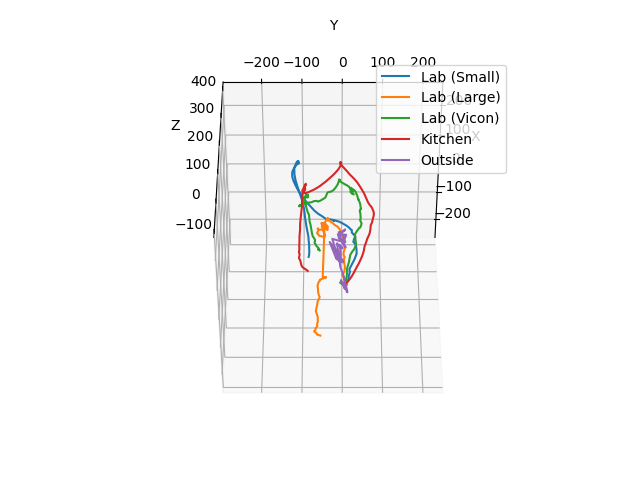

In [4]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
labels = ['Lab (Small)', 'Lab (Large)', 'Lab (Vicon)', 'Kitchen', 'Outside']
demos = [
    demos_lab, 
    demos_lab_large, 
    demos_vicon, 
    demos_kitchen, 
    demos_outside
]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.set_box_aspect([1.0, 1.0, 1.0])

for i, demo in enumerate(demos):
    ax.plot(demo[0][:, 0], demo[0][:, 1], demo[0][:, 2], '-', c=colors[i], label=labels[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(True)
ax.view_init(elev=-45, azim=0, roll=0)
plt.legend()
set_axes_equal(ax)
plt.show()

In [5]:
def save_trajectory_to_dat(trajectory, filename):
    # Save the trajectory to a .dat file in the specified format
    np.savetxt(filename, trajectory, fmt='%.6f', delimiter=' ')

for i, demo in enumerate(demos):
    save_trajectory_to_dat(demo[0], f"{labels[i]}.dat") 

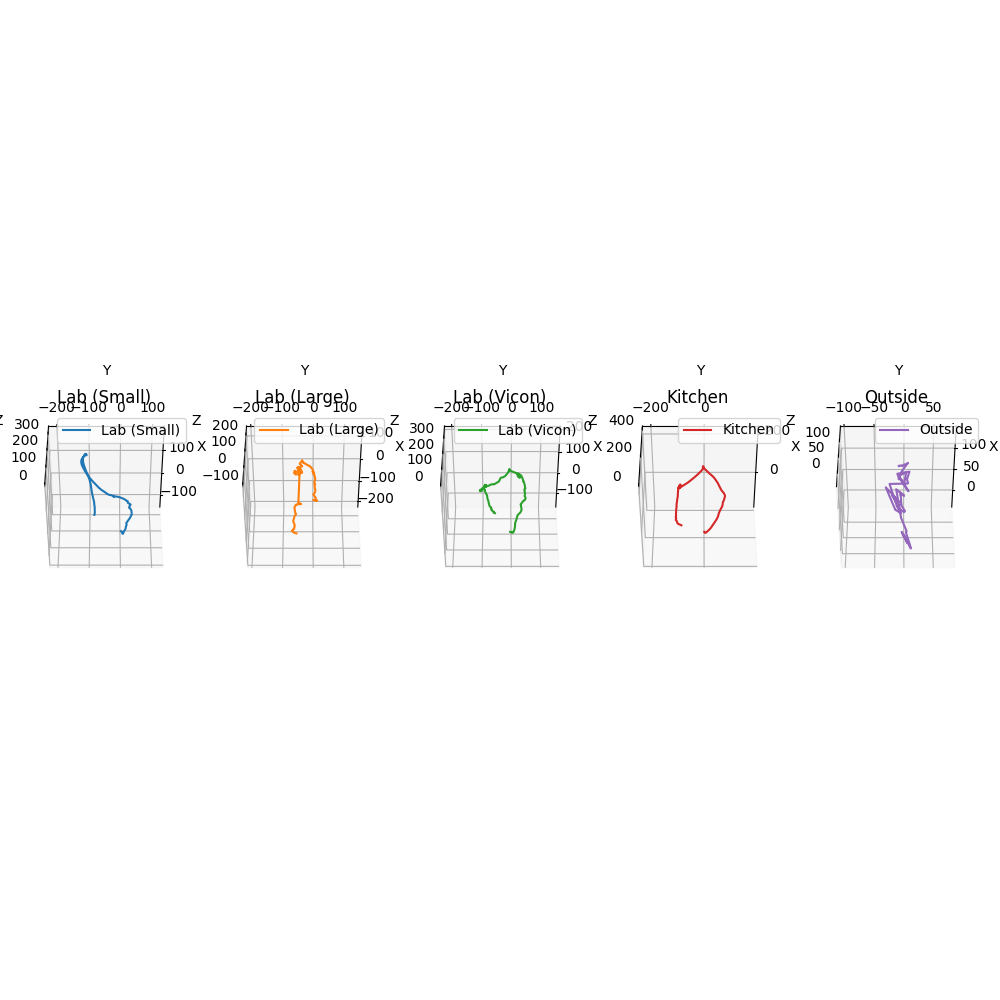

In [6]:
# Assuming the definitions of demos_lab, demos_vicon, demos_lab_large, demos_kitchen are available

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 5, subplot_kw={'projection': '3d'}, figsize=(10, 10))
axs = axs.ravel()  # Flatten the array to make iteration easier

for i, demo in enumerate(demos):
    ax = axs[i]
    ax.plot(demo[0][:, 0], demo[0][:, 1], demo[0][:, 2], '-', c=colors[i], label=labels[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(True)
    ax.view_init(elev=-45, azim=0, roll=0)
    ax.legend()
    ax.set_title(labels[i])
    set_axes_equal(ax)  # Assuming set_axes_equal is defined elsewhere

plt.tight_layout()
plt.show()